# Result evaluation

## Import libraries

In [245]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%matplotlib inline 

## Load data

### Wind power data

In [2]:
df_power = []
for i in range(1,11):
    df_power_zone = pd.read_csv('../data/Task 15/Task15_W_Zone1_10/Task15_W_Zone'+str(i)+'.csv', 
                                header=0, 
                                usecols=[1, 2], 
                                names=['datetime', 'wf'+str(i)])
    df_power_zone['datetime'] = pd.to_datetime(df_power_zone['datetime'], format='%Y%m%d %H:%M')
    df_power_zone.index = df_power_zone['datetime']
    df_power_zone = df_power_zone.drop(['datetime'], axis=1)
    df_power.append(df_power_zone)
df_power = pd.concat(df_power, axis=1, join='outer')

In [3]:
print(df_power.index[0])
print(df_power.index[-1])
df_power.head()

2012-01-01 01:00:00
2013-12-01 00:00:00


,wf1,wf2,wf3,wf4,wf5,wf6,wf7,wf8,wf9,wf10
datetime,,,,,,,,,,
2012-01-01 01:00:00,0.000000,0.596273,0.425465,0.378229,0.273678,0.268101,0.000000,0.000000,0.0,0.594361
2012-01-01 02:00:00,0.054879,0.411180,0.363851,0.063012,0.086796,0.034542,0.014708,0.014954,0.0,0.569679
2012-01-01 03:00:00,0.110234,0.167243,0.297129,0.036704,0.006811,0.020621,0.035098,0.071785,0.0,0.330539
2012-01-01 04:00:00,0.165116,0.037326,0.235438,0.034342,0.018646,0.001867,0.045055,0.066796,0.0,0.211308
2012-01-01 05:00:00,0.156940,0.051206,0.120904,0.033554,0.034812,0.015174,0.050160,0.034797,0.0,0.172140


### Clean data

In [4]:
df_power = df_power.fillna(method='ffill')

In [40]:
['sd'] + [12]

['sd', 12]

## Load benchmark

In [68]:
df_bench = []
for i in range(1,16): 
    df_bench_task = pd.read_csv('../data/Task '+str(i)+'/benchmark'+str(i)+'_W.csv', 
                                header=0,
                                usecols=range(101),
                                names=['wf', 'datetime']+[j for j in range(1,100)])
    df_bench_task['datetime'] = pd.to_datetime(df_bench_task['datetime'], format='%Y%m%d %H:%M')
    df_bench_task.index = df_bench_task['datetime']
    df_bench_task = df_bench_task.drop(['datetime'], axis=1)
    df_bench_task = df_bench_task.pivot(columns='wf')
    df_bench_task = df_bench_task.swaplevel(i=0, j=1, axis=1)
    df_bench.append(df_bench_task)
df_bench = pd.concat(df_bench, axis=0, join='outer')

In [71]:
print(df_bench.index[0])
print(df_bench.index[-1])
df_bench.head()

2012-10-01 01:00:00
2014-01-01 00:00:00


wf,1,2,3,4,5,6,7,8,9,10,...,1,2,3,4,5,6,7,8,9,10
,1,1,1,1,1,1,1,1,1,1,...,99,99,99,99,99,99,99,99,99,99
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 01:00:00,0,0,0,0,0,0,0,0,0,0,...,0.984776,0.932325,0.971574,0.995274,0.989199,0.994617,0.919531,0.922071,0.981716,0.992037
2012-10-01 02:00:00,0,0,0,0,0,0,0,0,0,0,...,0.984776,0.932325,0.971574,0.995274,0.989199,0.994617,0.919531,0.922071,0.981716,0.992037
2012-10-01 03:00:00,0,0,0,0,0,0,0,0,0,0,...,0.984776,0.932325,0.971574,0.995274,0.989199,0.994617,0.919531,0.922071,0.981716,0.992037
2012-10-01 04:00:00,0,0,0,0,0,0,0,0,0,0,...,0.984776,0.932325,0.971574,0.995274,0.989199,0.994617,0.919531,0.922071,0.981716,0.992037
2012-10-01 05:00:00,0,0,0,0,0,0,0,0,0,0,...,0.984776,0.932325,0.971574,0.995274,0.989199,0.994617,0.919531,0.922071,0.981716,0.992037


## Plot benchmark

Plot the quantiles for the whole period. 

<Figure size 432x288 with 0 Axes>

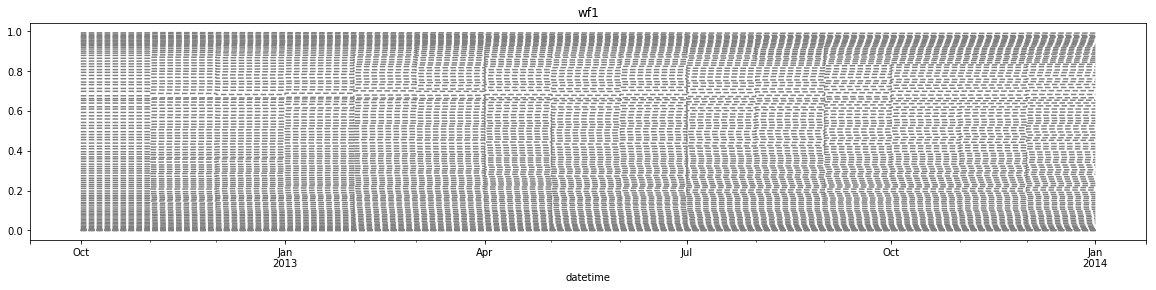

<Figure size 432x288 with 0 Axes>

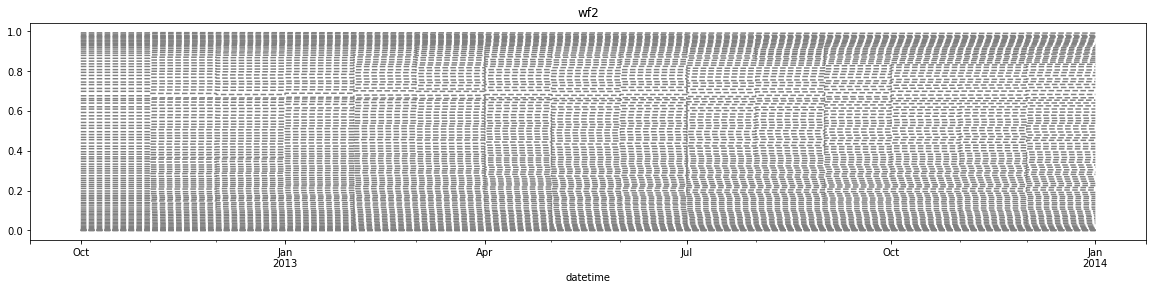

<Figure size 432x288 with 0 Axes>

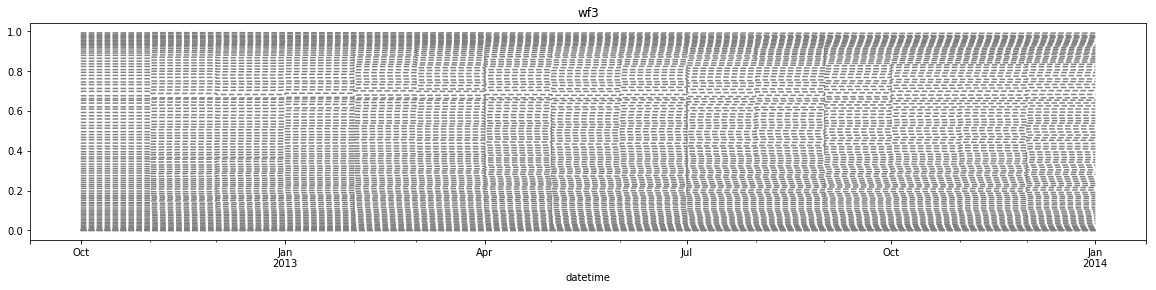

<Figure size 432x288 with 0 Axes>

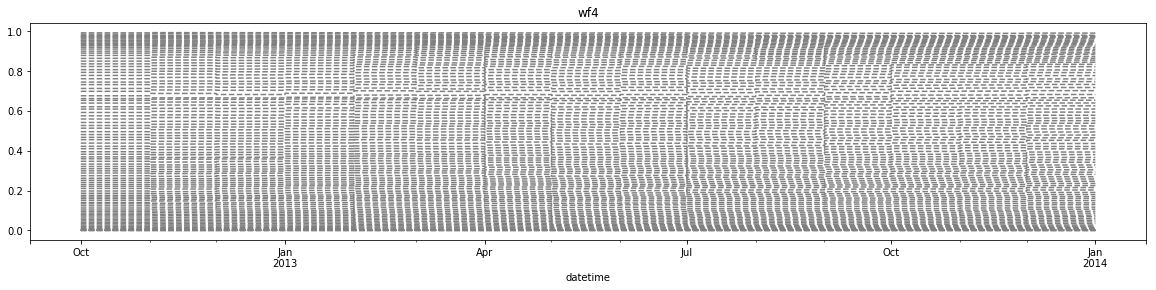

<Figure size 432x288 with 0 Axes>

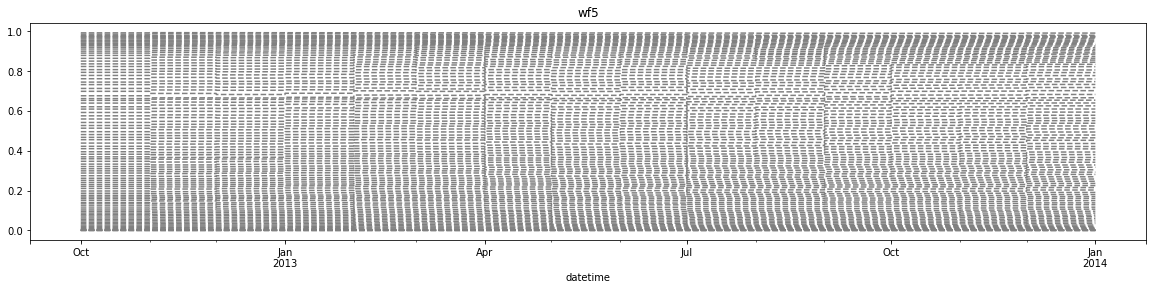

<Figure size 432x288 with 0 Axes>

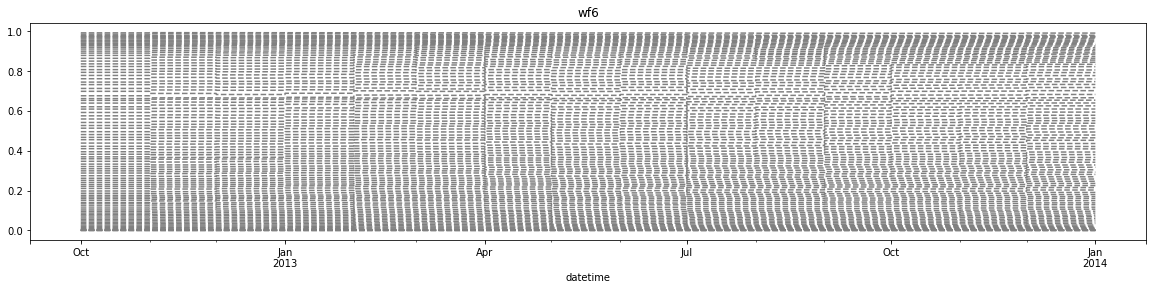

<Figure size 432x288 with 0 Axes>

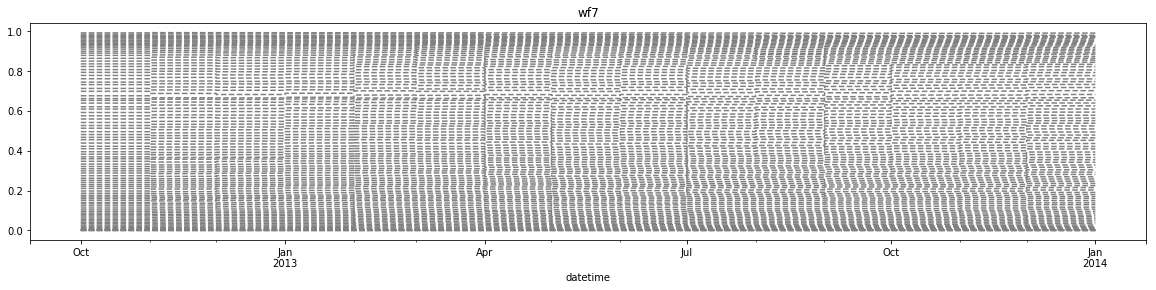

<Figure size 432x288 with 0 Axes>

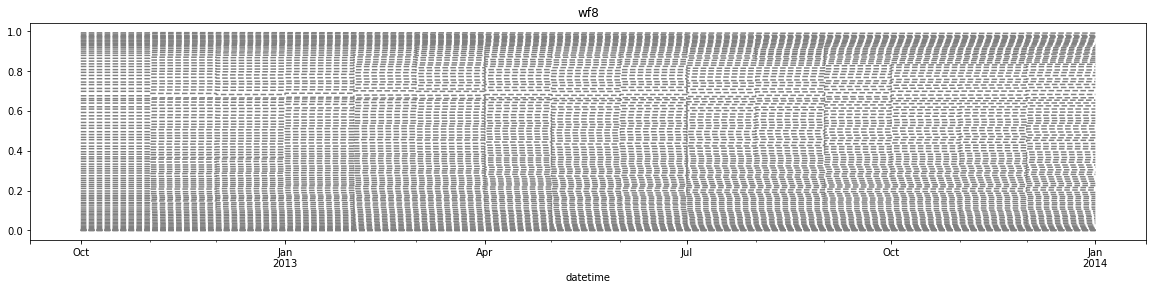

<Figure size 432x288 with 0 Axes>

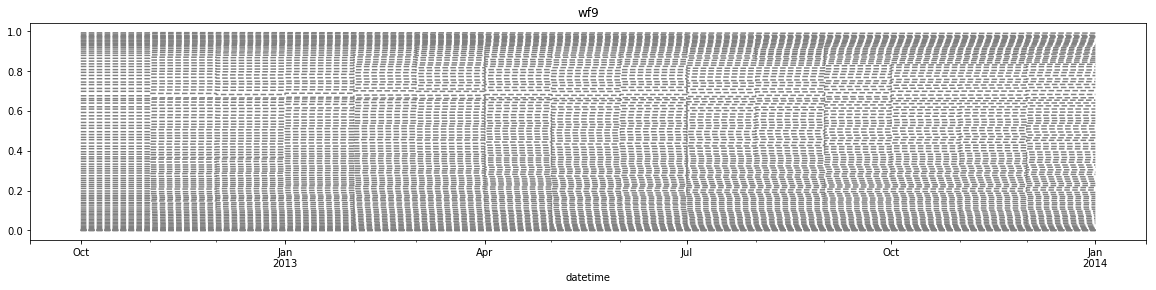

<Figure size 432x288 with 0 Axes>

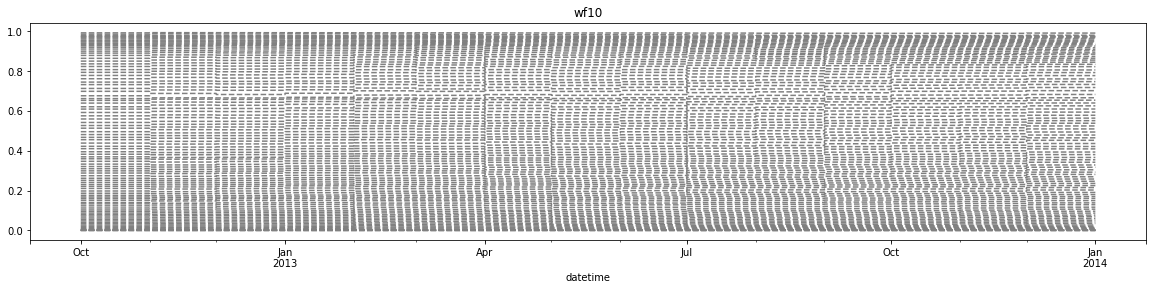

In [77]:
for wf in df_bench.columns.levels[0]: 
    plt.figure()
    df_bench[column].plot(linestyle='--', color='grey', legend=False, title='wf'+str(wf),figsize=(20,4));

Plot some example benchmark distributions. 

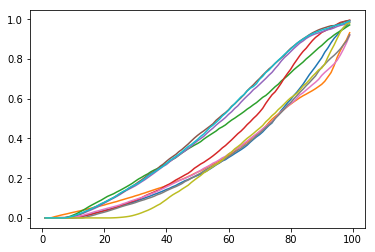

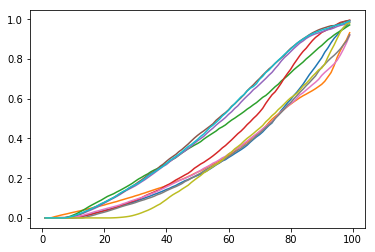

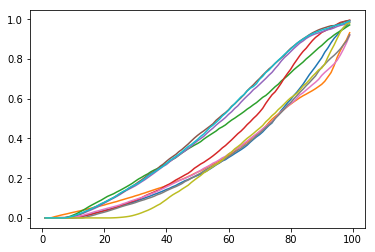

In [76]:
for date in ['2012-10-01 16:00:00', '2012-10-10 16:00:00', '2012-10-15 16:00:00']:
    plt.figure()
    for column in df_bench.columns.levels[0]: 
        df_bench.loc['2012-10-05 16:00:00', :][column].plot()

## Calculate quantiles

In [198]:
q = 0.25
for i in range(1,11):
    print(df_bench[i][int(100*q)][0]-df_power[:date_start].quantile(q=q)['wf'+str(i)])

-0.00011747047142669775
-1.9892022920298125e-05
-4.917583062399866e-05
0.0
-1.1232522195023242e-05
-1.772609635898592e-05
-1.753853850409992e-05
-3.041077883990384e-05
0.0
0.00014515060926599543


The benchmark is quantiles for the data distribution that is updated for every task. 

## Benchmark NCRPS

In [221]:
date_start = df_bench.index[0]
date_end = df_power.index[-1]
samples = int(len(df_power[date_start:date_end])/24)

In [222]:
y_real = df_power[date_start:date_end].values.reshape(samples, 24, 10)
y_bench = df_bench[date_start:date_end].values.reshape(samples, 24, 99, 10)

In [223]:
print(y_real.shape)
print(y_bench.shape)

(426, 24, 10)
(426, 24, 99, 10)


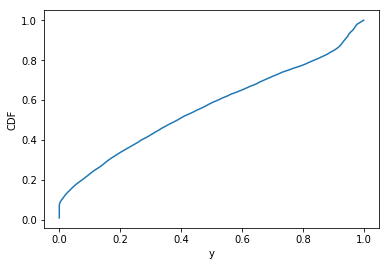

In [265]:
plt.plot(np.append(y_bench[20,10,:,4],1), np.append(df_bench.columns.levels[1].values/100,1))
plt.xlabel('y');
plt.ylabel('CDF');

In [253]:
N = 100
y = np.linspace(0, 1, N)

In [274]:
F_bench = np.empty((len(y), y_bench.shape[0], y_bench.shape[1], y_bench.shape[3]))
for i in range(y_bench.shape[0]):
    for j in range(y_bench.shape[1]):
        for k in range(y_bench.shape[3]):
            F = interp1d(np.append(y_bench[i,j,:,k],1), np.append(df_bench.columns.levels[1].values/100,1), kind='linear')
            F_bench[:,i,j,k] = F(y)

In [280]:
I = np.heaviside(np.moveaxis(y-y_real[:,:,:,np.newaxis],-1,0),0)
ncrps = (F_bench-I)**2
NCRPS = np.trapz(ncrps, y, axis=0)

In [292]:
NMAE = np.abs(y_bench[:,:,50,:]-y_real)

Text(0.5,0,'Lead time')

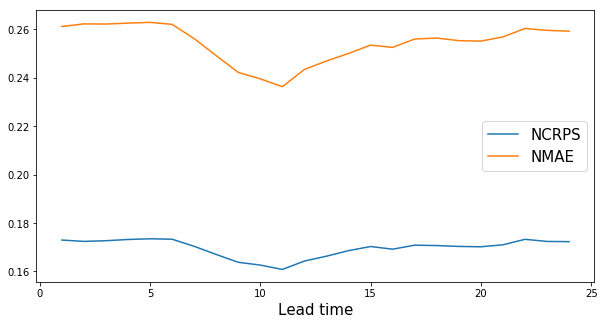

In [293]:
plt.figure(figsize=(10,5))
plt.plot(range(1, 25), np.mean(NCRPS, axis=(0,2)), label='NCRPS')
plt.plot(range(1, 25), np.mean(NMAE, axis=(0,2)), label='NMAE')
plt.legend(fontsize=15)
plt.xlabel('Lead time', fontsize=15)

Taking the 50:th quantile give higher CRPS than taking the distribution. 